In [1]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cityblock
import random
import seaborn as sns

In [2]:
df = pd.read_csv('data_ecom.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
len(df)

541909

In [5]:
#summary 
len(df['InvoiceNo'].unique()), len(df['StockCode'].unique())

(25900, 4070)

In [6]:
# Filter out POST
df = df[df['StockCode']!='POST']

In [7]:
# Stripping extra spaces in the description
df['Description'] = df['Description'].str.strip()
  
# Dropping the rows without any invoice number
df.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
  
# Dropping all transactions which were done on credit
df = df[~df['InvoiceNo'].str.contains('C')]

In [8]:
#prepare basket for apriori
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [9]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#hot encode
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [11]:
basket_sets

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# get frequent items on support
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True).sort_values('support', ascending=False)
frequent_itemsets

In [ ]:
# General rules -> no relations
rules = association_rules(frequent_itemsets, metric ="lift")
rules

In [10]:
# Basket for France
basket_UK = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'StockCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [18]:
df[df['Country'] =="United Kingdom"]['InvoiceNo'].min()

'536365'

In [16]:
basket_UK = basket_UK.applymap(encode_units)

In [17]:
basket_UK

StockCode,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,DOT,M,PADS,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
len(df[df['Country'] =="United Kingdom"]['InvoiceNo'].unique()), len(df[df['Country'] =="United Kingdom"]['StockCode'].unique())

(20078, 4054)

In [ ]:
frq_items = apriori(basket_UK, min_support = 0.001, use_colnames = True, max_len=2)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

Support is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.

Confidence is a measure of the reliability of the rule. A confidence of .5 in the above example would mean that in 50% of the cases where Diaper and Gum were purchased, the purchase also included Beer and Chips. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.

Lift is the ratio of the observed support to that expected if the two rules were independent (see wikipedia). The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

In [19]:
filter_rules = rules.loc[(rules['confidence']>0.5) & (rules['lift']>1.0)]
filter_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [29]:
#France WH
coordinates = [[x,y] for x in range(65) for y in range(65)]
coordinates2 = [[x,y] for x in range(65) for y in range(65)]
x = [p[0] for p in coordinates]
y = [p[1] for p in coordinates]

In [30]:
# not used
distance0 = []
def manhattan(coord):
    for i in range(len(coord)):
        distance0.append(cityblock([0,0],[coord[i][0],coord[i][1]]))
manhattan(coordinates)

In [31]:
# not used
dic = {'x':x, 'y':y,'coordinates':coordinates, 'distance0':distance0}

In [32]:
wh = pd.DataFrame(dic).sort_values('distance0')
wh['rank'] = wh['distance0'].rank(method='first')
wh.reset_index(inplace=True, drop=True)
wh.head()

,x,y,coordinates,distance0,rank
0,0,0,"[0, 0]",0,1.0
1,1,0,"[1, 0]",1,2.0
2,0,1,"[0, 1]",1,3.0
3,0,2,"[0, 2]",2,4.0
4,2,0,"[2, 0]",2,5.0


In [33]:
len(wh)

4225

In [34]:
# filter products France
products_uk = df[df['Country'] =="United Kingdom"]
products_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [42]:
# French stock codes with support + rank
products = products_uk.groupby('StockCode').agg({'Quantity':'count'}).reset_index().sort_values('Quantity', ascending=False)
products['Support'] = products['Quantity']/sum(products['Quantity'])
products['Rank'] = products['Support'].rank(method='first',ascending=False)
products.reset_index(inplace=True, drop=True)
products.head()

,StockCode,Quantity,Support,Rank
0,85123A,2175,0.004461,1.0
1,85099B,1960,0.004020,2.0
2,22423,1714,0.003515,3.0
3,47566,1615,0.003312,4.0
4,20725,1421,0.002914,5.0


In [46]:
products

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc
0,85123A,2175,0.004461,1.0,"[21, 8]","[0, 0]"
1,85099B,1960,0.004020,2.0,"[38, 63]","[1, 0]"
2,22423,1714,0.003515,3.0,"[27, 12]","[0, 1]"
3,47566,1615,0.003312,4.0,"[57, 55]","[0, 2]"
4,20725,1421,0.002914,5.0,"[55, 14]","[2, 0]"
...,...,...,...,...,...,...
4049,85060,1,0.000002,4050.0,"[28, 38]","[61, 49]"
4050,85049c,1,0.000002,4051.0,"[46, 15]","[50, 60]"
4051,37424,1,0.000002,4052.0,"[29, 11]","[51, 59]"
4052,20689,1,0.000002,4053.0,"[28, 28]","[63, 47]"


In [43]:
# Randomly shuffel locations and adding random + location based on support
random.shuffle(coordinates2)
products['RandomLoc'] = coordinates2[0:int(len(products['StockCode']))]
products['SupportLoc'] = wh['coordinates'][0:int(len(products['StockCode']))+1]
filter_rules.reset_index(inplace=True, drop=True)

In [44]:
filter_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [41]:
def combine(df):
    ls = []
    ls_len = []
    for row in range(len(df)):
        _ = []
        for j in df['antecedents'][row]:
            if j not in _:
                _.append(j)
        for k in df['consequents'][row]:
            if k not in _:
                _.append(k)
        ls.append(sorted(_))
        ls_len.append(len(_))
    df['combined'] = ls
    df['len'] = ls_len
    
        #df['combined'] = ls

In [107]:
combine(filter_rules)
filter_rules

/Users/admin/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/admin/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,combined,len
0,(21094),(21086),0.129199,0.139535,0.124031,0.960000,6.880000,0.106003,21.511628,"[21086, 21094]",2
1,(23256),(23254),0.069767,0.072351,0.064599,0.925926,12.797619,0.059552,12.523256,"[23254, 23256]",2
2,(21988),(21987),0.056848,0.064599,0.051680,0.909091,14.072727,0.048007,10.289406,"[21987, 21988]",2
3,(23254),(23256),0.072351,0.069767,0.064599,0.892857,12.797619,0.059552,8.682171,"[23254, 23256]",2
4,(21086),(21094),0.139535,0.129199,0.124031,0.888889,6.880000,0.106003,7.837209,"[21086, 21094]",2
5,(22727),(22726),0.095607,0.098191,0.080103,0.837838,8.532717,0.070716,5.561154,"[22726, 22727]",2
6,(22726),(22727),0.098191,0.095607,0.080103,0.815789,8.532717,0.070716,4.909561,"[22726, 22727]",2
7,(21987),(21988),0.064599,0.056848,0.051680,0.800000,14.072727,0.048007,4.715762,"[21987, 21988]",2
8,(21094),(21080),0.129199,0.134367,0.103359,0.800000,5.953846,0.085999,4.328165,"[21080, 21094]",2
9,(22727),(22728),0.095607,0.103359,0.074935,0.783784,7.583108,0.065054,4.146964,"[22727, 22728]",2


In [172]:
insert = filter_rules[['combined','support','len']].rename(columns={'combined':'StockCode','support':'Total Support', 'len':'Length'})
insert['Support'] = insert['Total Support'] / insert['Length']
insert.sort_values('Support', ascending=False)

,StockCode,Total Support,Length,Support
0,"[21086, 21094]",0.124031,2,0.062016
4,"[21086, 21094]",0.124031,2,0.062016
20,"[22551, 22554]",0.105943,2,0.052972
13,"[22551, 22554]",0.105943,2,0.052972
23,"[22554, 22556]",0.103359,2,0.051680
8,"[21080, 21094]",0.103359,2,0.051680
22,"[22554, 22556]",0.103359,2,0.051680
10,"[21080, 21094]",0.103359,2,0.051680
11,"[21080, 21086]",0.103359,2,0.051680
14,"[21080, 21086]",0.103359,2,0.051680


In [169]:
insert

,StockCode,Total Support,Length,Support
0,"[21086, 21094]",0.124031,2,0.062016
1,"[23254, 23256]",0.064599,2,0.032300
2,"[21987, 21988]",0.051680,2,0.025840
3,"[23254, 23256]",0.064599,2,0.032300
4,"[21086, 21094]",0.124031,2,0.062016
5,"[22726, 22727]",0.080103,2,0.040052
6,"[22726, 22727]",0.080103,2,0.040052
7,"[21987, 21988]",0.051680,2,0.025840
8,"[21080, 21094]",0.103359,2,0.051680
9,"[22727, 22728]",0.074935,2,0.037468


In [175]:
products_m = products[['StockCode','Support']]
products_m.sort_values('Support', ascending=False)

,StockCode,Support
25,23084,0.009127
26,21731,0.008757
0,22554,0.008387
1,22556,0.008140
2,22326,0.007647
...,...,...
1183,23562,0.000123
1182,84569A,0.000123
1181,21658,0.000123
1180,84559A,0.000123


In [176]:
type(products_m['StockCode'][0])

str

In [177]:
combined_list = insert[['StockCode','Support']].append(products_m).sort_values('Support', ascending=False).reset_index().drop('index', axis=1)
combined_list.head(50)

,StockCode,Support
0,"[21086, 21094]",0.062016
1,"[21086, 21094]",0.062016
2,"[22551, 22554]",0.052972
3,"[22551, 22554]",0.052972
4,"[22554, 22556]",0.051680
5,"[21080, 21094]",0.051680
6,"[21080, 21094]",0.051680
7,"[21080, 21086]",0.051680
8,"[21080, 21086]",0.051680
9,"[22554, 22556]",0.051680


In [112]:
type(combined_list['StockCode'][0])==list

True

In [113]:
ls_combo = []
for i in range(len(combined_list)):
    if type(combined_list['StockCode'][i])==list:
        for j in combined_list['StockCode'][i]:
            if j not in ls_combo:
               ls_combo.append(j)
    else:
        if combined_list['StockCode'][i] not in ls_combo:
            ls_combo.append(combined_list['StockCode'][i])

In [114]:
combo_df = pd.DataFrame(ls_combo, columns=['StockCode'])
combo_df['ComboLoc'] = wh['coordinates'][0:int(len(combo_df['StockCode']))+1]
combo_df

,StockCode,ComboLoc
0,21086,"[0, 0]"
1,21094,"[0, 1]"
2,22551,"[1, 0]"
3,22554,"[0, 2]"
4,22556,"[2, 0]"
...,...,...
1536,23562,"[38, 30]"
1537,84569A,"[29, 39]"
1538,21658,"[35, 33]"
1539,84559A,"[32, 36]"


In [115]:
# Combine lists of pairs
ls_ant = []
for i in filter_rules['antecedents']:
    ls_ant.append(list(i))
    
ls_con = []
for i in filter_rules['consequents']:
    ls_con.append(list(i))
    
ls_comb = list(zip(ls_ant,ls_con))
ls_comb

[(['21094'], ['21086']),
 (['23256'], ['23254']),
 (['21988'], ['21987']),
 (['23254'], ['23256']),
 (['21086'], ['21094']),
 (['22727'], ['22726']),
 (['22726'], ['22727']),
 (['21987'], ['21988']),
 (['21094'], ['21080']),
 (['22727'], ['22728']),
 (['21080'], ['21094']),
 (['21080'], ['21086']),
 (['22726'], ['22728']),
 (['22551'], ['22554']),
 (['21086'], ['21080']),
 (['22728'], ['22727']),
 (['22728'], ['22726']),
 (['22555'], ['22556']),
 (['22630'], ['22629']),
 (['22551'], ['22556']),
 (['22554'], ['22551']),
 (['22662'], ['22382']),
 (['22556'], ['22554']),
 (['22554'], ['22556']),
 (['22328'], ['22326']),
 (['22629'], ['22630']),
 (['22382'], ['20725']),
 (['20726'], ['22382']),
 (['22727'], ['22326']),
 (['22382'], ['20726']),
 (['22382'], ['23206']),
 (['23206'], ['20725']),
 (['22556'], ['22551']),
 (['21559'], ['22352']),
 (['23206'], ['22382'])]

In [116]:
# combine into one list + unique list + unique flat list
ls_comb2 = []
for i in range(len(ls_comb)):
    ls_comb2.append(sorted(ls_comb[i][0]+ls_comb[i][1]))
    
ls_sup = []
for i in filter_rules['support']:
    ls_sup.append(i)

ls_unique = []
for i in ls_comb2:
    if i not in ls_unique:
        ls_unique.append(i)
        
flat_list = set([item for sublist in ls_unique for item in sublist])

In [117]:
# Test
ls4 = []
for i, j in zip(ls_comb2, ls_sup):
    for k in ls_unique:
        if k == i:
            if [k,j] not in ls4:
                ls4.append([k,j])

In [118]:
# Test
ls5 = []
for i, j in ls4:
    for k in range(len(i)):
        ls5.append([i[k],j])

In [119]:
# Test
ls_sup2 = []
for i, j in zip(ls_comb2,ls_sup):
    for k in ls_unique:
        if i == k:
            ls_sup2.append([i, j])

In [120]:
# Test
ls3 = []
for i, j in sorted(zip(ls_sup,ls_comb2),reverse=True):
    ls3.append([i,j])

In [121]:
# Test
ls3_unique = []
for i in ls3:
    if i not in ls3_unique:
        ls3_unique.append(i)

In [122]:
# not used anymore I think
unique_sku = []
for i in range(len(ls_unique)):
    for j in ls_unique[i]:
        unique_sku.append(int(products[products['StockCode'] == j]['Quantity']))

In [123]:
# Full dict
dic_un = []
for i in ls_unique:
    dic_un.append({
        'combo':i
    })
for i in range(len(dic_un)):
    dic_un[i]['sku'] = [int(products[products['StockCode'] == j]['Quantity']) for j in dic_un[i]['combo']]
    dic_un[i]['avg_sku'] = int(np.mean(dic_un[i]['sku']))

In [124]:
flat_list = set([item for sublist in ls_unique for item in sublist])

In [125]:
#list for pair or not pair
flat = []
for i in products['StockCode']:
    if i in flat_list:
        flat.append(1)
    else:
        flat.append(0)
products.head(70)

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc
0,23084,74,0.009127,1.0,"[24, 15]","[0, 0]"
1,21731,71,0.008757,2.0,"[38, 31]","[0, 1]"
2,22554,68,0.008387,3.0,"[18, 11]","[1, 0]"
3,22556,66,0.008140,4.0,"[18, 26]","[0, 2]"
4,22326,62,0.007647,5.0,"[20, 39]","[2, 0]"
...,...,...,...,...,...,...
65,22467,23,0.002837,66.0,"[32, 0]","[9, 1]"
66,22992,22,0.002713,67.0,"[17, 11]","[0, 11]"
67,47566,22,0.002713,68.0,"[32, 2]","[7, 4]"
68,21988,22,0.002713,69.0,"[2, 19]","[10, 1]"


In [126]:
# Add check + sort DF
products['Check'] = flat
products.sort_values(['Check','Quantity'],ascending=False,inplace=True)
products.reset_index(inplace=True, drop=True)
products.head()

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc,Check
0,22554,68,0.008387,3.0,"[18, 11]","[1, 0]",1
1,22556,66,0.008140,4.0,"[18, 26]","[0, 2]",1
2,22326,62,0.007647,5.0,"[20, 39]","[2, 0]",1
3,20725,60,0.007400,6.0,"[37, 15]","[1, 1]",1
4,22352,56,0.006907,7.0,"[24, 5]","[2, 1]",1


In [127]:
products['BasketLoc'] = wh['coordinates'][0:int(len(products['StockCode']))+1]

In [128]:
products.sort_values('Rank')

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc,Check,BasketLoc
25,23084,74,0.009127,1.0,"[24, 15]","[0, 0]",0,"[5, 1]"
26,21731,71,0.008757,2.0,"[38, 31]","[0, 1]",0,"[4, 2]"
0,22554,68,0.008387,3.0,"[18, 11]","[1, 0]",1,"[0, 0]"
1,22556,66,0.008140,4.0,"[18, 26]","[0, 2]",1,"[0, 1]"
2,22326,62,0.007647,5.0,"[20, 39]","[2, 0]",1,"[1, 0]"
...,...,...,...,...,...,...,...,...
1536,22994,1,0.000123,1537.0,"[38, 10]","[38, 30]",0,"[38, 30]"
1537,22997,1,0.000123,1538.0,"[2, 18]","[29, 39]",0,"[29, 39]"
1538,22999,1,0.000123,1539.0,"[7, 10]","[35, 33]",0,"[35, 33]"
1539,23003,1,0.000123,1540.0,"[3, 38]","[32, 36]",0,"[32, 36]"


In [129]:
products = products.merge(combo_df, on='StockCode', how='left')

In [130]:
products

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc,Check,BasketLoc,ComboLoc
0,22554,68,0.008387,3.0,"[18, 11]","[1, 0]",1,"[0, 0]","[0, 2]"
1,22556,66,0.008140,4.0,"[18, 26]","[0, 2]",1,"[0, 1]","[2, 0]"
2,22326,62,0.007647,5.0,"[20, 39]","[2, 0]",1,"[1, 0]","[3, 2]"
3,20725,60,0.007400,6.0,"[37, 15]","[1, 1]",1,"[0, 2]","[1, 3]"
4,22352,56,0.006907,7.0,"[24, 5]","[2, 1]",1,"[2, 0]","[0, 5]"
...,...,...,...,...,...,...,...,...,...
1536,22994,1,0.000123,1537.0,"[38, 10]","[38, 30]",0,"[38, 30]","[24, 26]"
1537,22997,1,0.000123,1538.0,"[2, 18]","[29, 39]",0,"[29, 39]","[20, 30]"
1538,22999,1,0.000123,1539.0,"[7, 10]","[35, 33]",0,"[35, 33]","[38, 12]"
1539,23003,1,0.000123,1540.0,"[3, 38]","[32, 36]",0,"[32, 36]","[26, 24]"


In [131]:
#Merge tables
merge_prod = products[['StockCode','RandomLoc','SupportLoc','BasketLoc', 'ComboLoc', 'Check']]
merge_fr = products_fr.merge(merge_prod, on='StockCode', how='left')
merge_fr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RandomLoc,SupportLoc,BasketLoc,ComboLoc,Check
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,"[12, 38]","[6, 0]","[1, 4]","[1, 2]",1
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,"[26, 18]","[2, 4]","[4, 1]","[3, 0]",1
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,"[22, 37]","[5, 1]","[2, 3]","[2, 1]",1
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,"[15, 21]","[22, 18]","[22, 18]","[4, 39]",0
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,"[37, 4]","[8, 8]","[8, 8]","[6, 10]",0


In [132]:
# Merge distance to 0
merge_fr['Random0'] = merge_fr['RandomLoc'].apply(lambda x: cityblock([0,0],x))
merge_fr['Support0'] = merge_fr['SupportLoc'].apply(lambda x: cityblock([0,0],x))
merge_fr['Basket0'] = merge_fr['BasketLoc'].apply(lambda x: cityblock([0,0],x))
merge_fr['Combo0'] = merge_fr['ComboLoc'].apply(lambda x: cityblock([0,0],x))

In [133]:
merge_fr  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RandomLoc,SupportLoc,BasketLoc,ComboLoc,Check,Random0,Support0,Basket0,Combo0
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,"[12, 38]","[6, 0]","[1, 4]","[1, 2]",1,50,6,5,3
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,"[26, 18]","[2, 4]","[4, 1]","[3, 0]",1,44,6,5,3
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,"[22, 37]","[5, 1]","[2, 3]","[2, 1]",1,59,6,5,3
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,"[15, 21]","[22, 18]","[22, 18]","[4, 39]",0,36,40,40,43
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,"[37, 4]","[8, 8]","[8, 8]","[6, 10]",0,41,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[33, 0]","[0, 22]","[0, 22]","[17, 6]",0,33,22,22,23
8104,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[10, 5]","[1, 10]","[1, 10]","[1, 10]",0,15,11,11,11
8105,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[8, 11]","[7, 1]","[6, 0]","[2, 3]",1,19,8,6,5
8106,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[24, 2]","[2, 15]","[2, 15]","[17, 1]",0,26,17,17,18


In [134]:
%%time
# Creating dictionary
dic = []
for i in merge_fr['InvoiceNo'].unique():
    dic.append({
        'id' : i,
        'code' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['StockCode']],
        'sku' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['Quantity']],
        'random_coo' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['RandomLoc']],
        'support_coo' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['SupportLoc']],
        'basket_coo' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['BasketLoc']],
        'combo_coo' : [i for i in merge_fr[merge_fr['InvoiceNo']==i]['ComboLoc']],
        })

CPU times: user 2.51 s, sys: 33.3 ms, total: 2.54 s
Wall time: 2.53 s


In [135]:
# Distance to 0 to order route
for i in range(len(dic)):
    dic[i]['random0'] = [cityblock([0,0],i) for i in dic[i]['random_coo']]
    dic[i]['support0'] = [cityblock([0,0],i) for i in dic[i]['support_coo']]
    dic[i]['basket0'] = [cityblock([0,0],i) for i in dic[i]['basket_coo']]
    dic[i]['combo0'] = [cityblock([0,0],i) for i in dic[i]['combo_coo']]

In [136]:
# Sort locations + remove distance0
for i in range(len(dic)):
    dic[i]['random_coo'] = [0,0] + [i for i, j 
                            in sorted(zip(dic[i]['random_coo'],dic[i]['random0']), key = lambda t: t[1])] + [0,0]
    dic[i]['support_coo'] = [0,0] + [i for i, j 
                            in sorted(zip(dic[i]['support_coo'],dic[i]['support0']), key = lambda t: t[1])] + [0,0]
    dic[i]['basket_coo'] = [0,0] + [i for i, j 
                            in sorted(zip(dic[i]['basket_coo'],dic[i]['basket0']), key = lambda t: t[1])] + [0,0]
    dic[i]['combo_coo'] = [0,0] + [i for i, j 
                            in sorted(zip(dic[i]['combo_coo'],dic[i]['combo0']), key = lambda t: t[1])] + [0,0]
    del(dic[i]['random0'])
    del(dic[i]['support0'])
    del(dic[i]['basket0'])
    del(dic[i]['combo0'])

In [137]:
len(dic)

387

In [138]:
%%time
# Create distance steps
options = ['random_coo','support_coo','basket_coo', 'combo_coo']
for case in options:
    for i in range(len(dic)):
        for j in dic[i][case]:
            dic[i][f'{case}_steps'] = [cityblock(dic[i][case][j],dic[i][case][j+1]) 
                                                for j in range(len(dic[i][case])-1)]

CPU times: user 22.9 s, sys: 71.8 ms, total: 23 s
Wall time: 23 s


In [139]:
dic

[{'id': '536370',
  'code': ['22728',
   '22727',
   '22726',
   '21724',
   '21883',
   '10002',
   '21791',
   '21035',
   '22326',
   '22629',
   '22659',
   '22631',
   '22661',
   '21731',
   '22900',
   '21913',
   '22540',
   '22544',
   '22492'],
  'sku': [24,
   24,
   12,
   12,
   24,
   48,
   24,
   18,
   24,
   24,
   24,
   24,
   20,
   24,
   24,
   12,
   24,
   24,
   36],
  'random_coo': [0,
   0,
   [0, 3],
   [18, 7],
   [1, 34],
   [15, 21],
   [8, 28],
   [27, 10],
   [37, 4],
   [26, 18],
   [13, 34],
   [12, 38],
   [20, 30],
   [28, 23],
   [27, 28],
   [31, 27],
   [22, 37],
   [20, 39],
   [31, 28],
   [38, 31],
   [38, 36],
   0,
   0],
  'support_coo': [0,
   0,
   [0, 1],
   [2, 0],
   [0, 4],
   [3, 2],
   [6, 0],
   [2, 4],
   [5, 1],
   [0, 8],
   [2, 7],
   [3, 7],
   [4, 9],
   [14, 1],
   [8, 8],
   [7, 11],
   [13, 5],
   [13, 8],
   [20, 3],
   [25, 14],
   [22, 18],
   0,
   0],
  'basket_coo': [0,
   0,
   [1, 0],
   [0, 3],
   [1, 4],
   [4, 

In [140]:
# Create total distance per order
options = ['random_coo','support_coo','basket_coo', 'combo_coo']
for case in options:
    for i in range(len(dic)):
        for j in dic[i][case]:
            dic[i][f'{case}_distance'] = sum(dic[i][f'{case}_steps'])

In [141]:
dic[1]

{'id': '536852',
 'code': ['22549', '22544', '22539', '22661', '21791', '21786'],
 'sku': [12, 24, 24, 10, 12, 24],
 'random_coo': [0,
  0,
  [1, 17],
  [22, 12],
  [1, 34],
  [5, 34],
  [20, 30],
  [31, 28],
  0,
  0],
 'support_coo': [0,
  0,
  [3, 7],
  [14, 1],
  [7, 11],
  [10, 9],
  [2, 19],
  [5, 27],
  0,
  0],
 'basket_coo': [0,
  0,
  [4, 6],
  [14, 1],
  [7, 11],
  [10, 9],
  [2, 19],
  [5, 27],
  0,
  0],
 'combo_coo': [0,
  0,
  [3, 7],
  [7, 7],
  [14, 4],
  [9, 10],
  [8, 12],
  [15, 15],
  0,
  0],
 'random_coo_steps': [0, 18, 26, 43, 4, 19, 13, 59, 0],
 'support_coo_steps': [0, 10, 17, 17, 5, 18, 11, 32, 0],
 'basket_coo_steps': [0, 10, 15, 17, 5, 18, 11, 32, 0],
 'combo_coo_steps': [0, 10, 4, 10, 11, 3, 10, 30, 0],
 'random_coo_distance': 182,
 'support_coo_distance': 110,
 'basket_coo_distance': 108,
 'combo_coo_distance': 78}

In [142]:
#Get distance
ls_random = []
ls_support = []
ls_basket = []
ls_combo = []
for i in range(len(dic)):
    ls_random.append(dic[i]['random_coo_distance'])
    ls_support.append(dic[i]['support_coo_distance'])
    ls_basket.append(dic[i]['basket_coo_distance'])
    ls_combo.append(dic[i]['combo_coo_distance'])

In [143]:
#total distance per method
sum(ls_random), sum(ls_support), sum(ls_basket), sum(ls_combo)

(170710, 120324, 121152, 121638)

In [144]:
len(ls_random)

387

In [145]:
#Percentage changes methods
sum(ls_support)/sum(ls_random) - 1, sum(ls_basket)/sum(ls_combo) - 1

(-0.29515552691699376, -0.003995461944458101)

In [146]:
merge_fr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,RandomLoc,SupportLoc,BasketLoc,ComboLoc,Check,Random0,Support0,Basket0,Combo0
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,"[12, 38]","[6, 0]","[1, 4]","[1, 2]",1,50,6,5,3
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,"[26, 18]","[2, 4]","[4, 1]","[3, 0]",1,44,6,5,3
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,"[22, 37]","[5, 1]","[2, 3]","[2, 1]",1,59,6,5,3
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,"[15, 21]","[22, 18]","[22, 18]","[4, 39]",0,36,40,40,43
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,"[37, 4]","[8, 8]","[8, 8]","[6, 10]",0,41,16,16,16


In [147]:
#Viz
merge_viz = merge_fr[['RandomLoc', 'SupportLoc', 'BasketLoc', 'ComboLoc', 'Quantity','Check']]
wh_viz = wh[['x','y','coordinates']]

In [148]:
merge_viz['RandomLoc'] = merge_viz['RandomLoc'].apply(tuple)
merge_viz['SupportLoc'] = merge_viz['SupportLoc'].apply(tuple)
merge_viz['BasketLoc'] = merge_viz['BasketLoc'].apply(tuple)
merge_viz['ComboLoc'] = merge_viz['ComboLoc'].apply(tuple)
wh_viz['coordinates'] = wh_viz['coordinates'].apply(tuple)

/Users/admin/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/admin/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/admin/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [149]:
wh_random = merge_viz.groupby(['RandomLoc','Check'])['Quantity'].count().reset_index().rename(columns={'RandomLoc':'coordinates'})
wh_support = merge_viz.groupby(['SupportLoc','Check'])['Quantity'].count().reset_index().rename(columns={'SupportLoc':'coordinates'})
wh_basket = merge_viz.groupby(['BasketLoc','Check'])['Quantity'].count().reset_index().rename(columns={'BasketLoc':'coordinates'})
wh_combo = merge_viz.groupby(['ComboLoc','Check'])['Quantity'].count().reset_index().rename(columns={'ComboLoc':'coordinates'})

In [150]:
wh_random = wh_random.merge(wh_viz, on='coordinates', how='left')
wh_support= wh_support.merge(wh_viz, on='coordinates', how='left')
wh_basket = wh_basket.merge(wh_viz, on='coordinates', how='left')
wh_combo = wh_combo.merge(wh_viz, on='coordinates', how='left')

In [151]:
wh_random.head()

,coordinates,Check,Quantity,x,y
0,"(0, 0)",0,5,0,0
1,"(0, 1)",0,1,0,1
2,"(0, 2)",0,17,0,2
3,"(0, 3)",0,8,0,3
4,"(0, 4)",0,1,0,4


<AxesSubplot:xlabel='x', ylabel='y'>

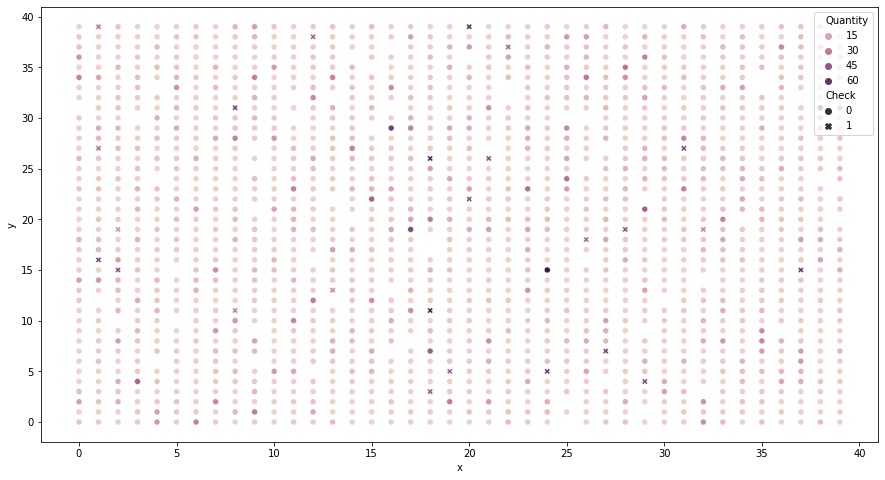

In [152]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=wh_random, x='x', y='y', hue='Quantity', style='Check')

<AxesSubplot:xlabel='x', ylabel='y'>

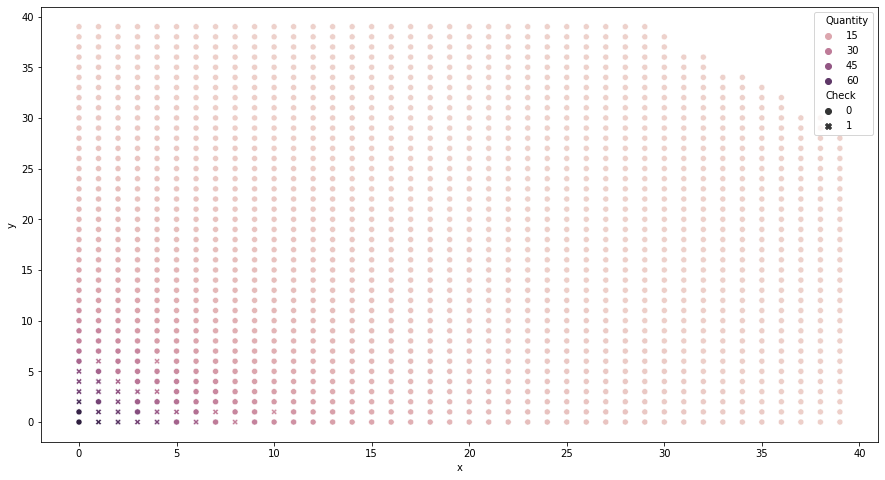

In [153]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=wh_support, x='x', y='y', hue='Quantity', style='Check')

<AxesSubplot:xlabel='x', ylabel='y'>

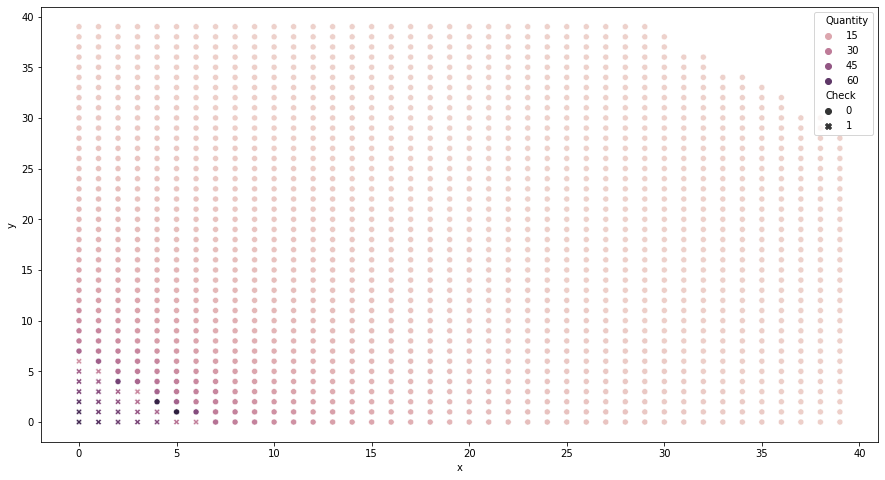

In [154]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=wh_basket, x='x', y='y', hue='Quantity', style='Check')

<AxesSubplot:xlabel='x', ylabel='y'>

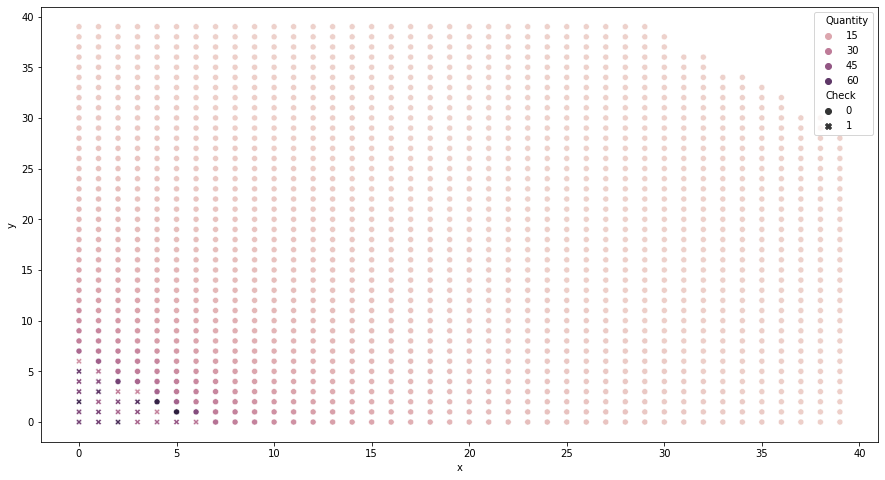

In [155]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=wh_combo, x='x', y='y', hue='Quantity', style='Check')

In [156]:
wh

,x,y,coordinates,distance0,rank
0,0,0,"[0, 0]",0,1.0
1,0,1,"[0, 1]",1,2.0
2,1,0,"[1, 0]",1,3.0
3,0,2,"[0, 2]",2,4.0
4,2,0,"[2, 0]",2,5.0
...,...,...,...,...,...
1595,38,38,"[38, 38]",76,1596.0
1596,37,39,"[37, 39]",76,1597.0
1597,39,38,"[39, 38]",77,1598.0
1598,38,39,"[38, 39]",77,1599.0


In [157]:
products.sort_values('Rank')

,StockCode,Quantity,Support,Rank,RandomLoc,SupportLoc,Check,BasketLoc,ComboLoc
25,23084,74,0.009127,1.0,"[24, 15]","[0, 0]",0,"[5, 1]","[5, 1]"
26,21731,71,0.008757,2.0,"[38, 31]","[0, 1]",0,"[4, 2]","[4, 2]"
0,22554,68,0.008387,3.0,"[18, 11]","[1, 0]",1,"[0, 0]","[0, 2]"
1,22556,66,0.008140,4.0,"[18, 26]","[0, 2]",1,"[0, 1]","[2, 0]"
2,22326,62,0.007647,5.0,"[20, 39]","[2, 0]",1,"[1, 0]","[3, 2]"
...,...,...,...,...,...,...,...,...,...
1536,22994,1,0.000123,1537.0,"[38, 10]","[38, 30]",0,"[38, 30]","[24, 26]"
1537,22997,1,0.000123,1538.0,"[2, 18]","[29, 39]",0,"[29, 39]","[20, 30]"
1538,22999,1,0.000123,1539.0,"[7, 10]","[35, 33]",0,"[35, 33]","[38, 12]"
1539,23003,1,0.000123,1540.0,"[3, 38]","[32, 36]",0,"[32, 36]","[26, 24]"


# KTN - Boardriders

## Market basket analysis

> - identifies the strength of association between pairs of products purchased together

> - identify patterns of co-occurrence, two or more things take place together

>> In essence it generates if -> then scenario's

<h4 align="center">Components of algorithm</h4>
<hr>
<div style="text-align: center"> Support </div>
<hr>
<div style="text-align: center"> Confidence</div>
<hr>
<div style="text-align: center"> Lift</div>
<hr>

<h5 align="center">A note on the metrics</h5>

<div>
<center><img src="itemset.png" width="200"/></center>
</div>
<hr>
<div style="text-align: center"> Contains antecedents and consequents, both of which are part of an itemset</div>
<hr>
<div style="text-align: center"> Implication here is co-occurence not causality</div>

<h4 align="center">Support</h4>
<hr>
<div style="text-align: center"> How frequent is an itemset in all transactions</div>
<hr>
<div style="text-align: center"> Used to identify rules worth analysing further </div>


> $$ Support(X  \cap  Y) = \frac{Frequency(X \cap Y)}{N} $$

<h5 align="center">Example</h5>

<div>
<center><img src="venn.png" width="200" align="center"/></center>
</div>

<hr>
<div style="text-align: center"> Support(Toothbrush&Milk) = 10/84 = 0.12 </div>
<hr>
<div style="text-align: center"> 12% of transactions contain both toothbrush & milk </div>

<h4 align="center">Confidence</h4>
<hr>
<div style="text-align: center"> the likeliness of consequent occuring when antecedent is present </div>


> $$ Confidence(X \cap Y) = \frac{Frequency(X \cap Y)}{Frequency(X)} $$

<h5 align="center">Example</h5>

<div>
<center><img src="venn.png" width="200" align="center"/></center>
</div>

<hr>
<div style="text-align: center"> Confidence(Toothbrush&Milk) = 10/14 = 0.7 </div>
<hr>
<div style="text-align: center"> Probability of having milk on the cart with the knowledge that toothbrush is present 70% </div>
<hr>
<div style="text-align: center"> Can be misleading as we can see that there is a weak association </div>

<h4 align="center">Lift</h4>
<hr>
<div style="text-align: center"> Lift controls for the support (frequency) of consequent while calculating the conditional probability of occurrence of Y given X </div>


> $$ Lift(X \cap Y) = \frac{Support(X \cap Y)}{Support(Y)} $$
<hr>
<div style="text-align: center"> more then 1: itemset more likely to be bought together </div>
<hr>
<div style="text-align: center"> 1: no association </div>
<hr>
<div style="text-align: center"> less then 1: less likely to be bought together </div>

<h5 align="center">Example</h5>

<div>
<center><img src="venn.png" width="200" align="center"/></center>
</div>
<hr>
<div style="text-align: center"> Probability of having milk on the cart with the knowledge that toothbrush is present 70% </div>
<hr>
<div style="text-align: center"> Consider the probability of having milk on the cart without any knowledge about toothbrush: 80/100 = 80% </div>
<hr>
<div style="text-align: center"> having toothbrush on the cart actually reduces the probability of having milk on the cart to 0.7 from 0.8 </div>
<hr>
<div style="text-align: center"> Lift(Toothbrush&Milk) = 0.7/0.8 = 0.87 </div>
<hr>
<div style="text-align: center"> A value of lift less than 1 shows that having toothbrush on the cart does not increase the chances of occurrence of milk on the cart in spite of the rule showing a high confidence value </div>

### Dataset of orders for unidentified e-com store

#### Preprocessing

In [82]:
df_fr = df[df['Country'] =="France"]
df_fr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [83]:
print(f"Total # of unique orders {len(df_fr['InvoiceNo'].unique())}")
print(f"Total # of unique references {len(df_fr['StockCode'].unique())}")

Total # of unique orders 387
Total # of unique references 1541


In [84]:
basket_France = basket_France.applymap(encode_units)
basket_France.head()

StockCode,10002,10120,10125,10135,11001,15036,15039,15044C,15056BL,15056N,...,90030B,90030C,90031,90099,90184B,90184C,90201B,90201C,C2,M
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(21094),(21086),0.129199,0.139535,0.124031,0.960000,6.880000,0.106003,21.511628
66,(23256),(23254),0.069767,0.072351,0.064599,0.925926,12.797619,0.059552,12.523256
34,(21988),(21987),0.056848,0.064599,0.051680,0.909091,14.072727,0.048007,10.289406
67,(23254),(23256),0.072351,0.069767,0.064599,0.892857,12.797619,0.059552,8.682171
24,(21086),(21094),0.139535,0.129199,0.124031,0.888889,6.880000,0.106003,7.837209


#### Simulation

#### Random Allocation

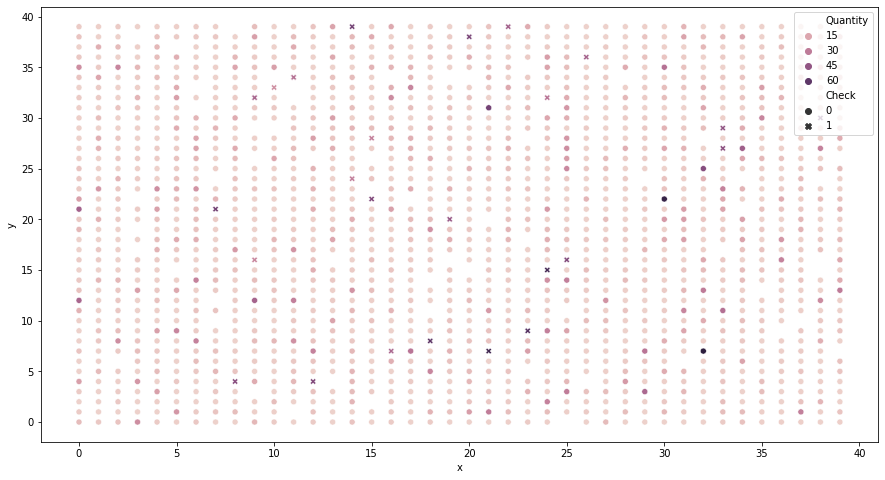

In [86]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=wh_random, x='x', y='y', hue='Quantity', style='Check')
plt.legend(loc='upper right')

#### Support Allocation

<AxesSubplot:xlabel='x', ylabel='y'>

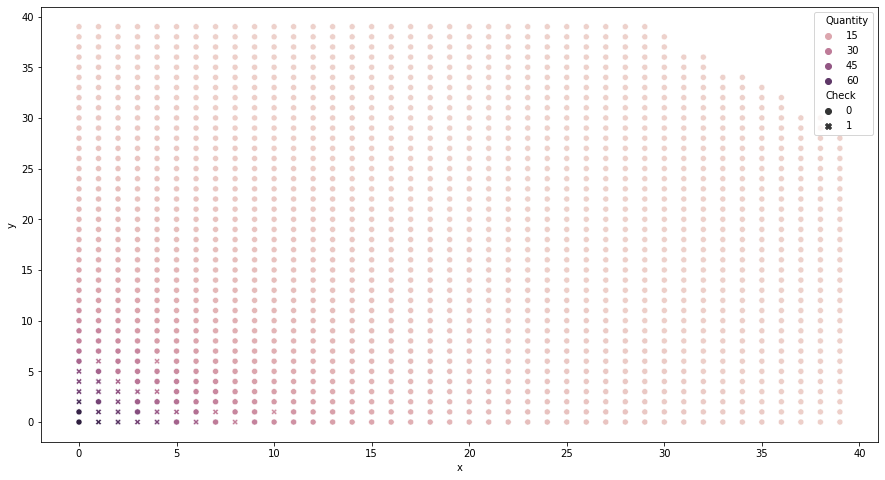

In [87]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=wh_support, x='x', y='y', hue='Quantity', style='Check')

#### Rules Allocation

<AxesSubplot:xlabel='x', ylabel='y'>

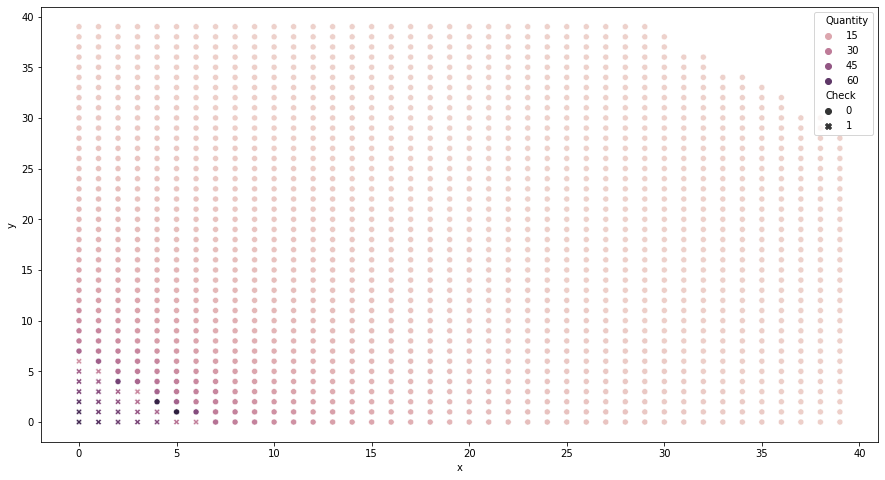

In [88]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=wh_basket, x='x', y='y', hue='Quantity', style='Check')

#### Simulation walking distance

In [89]:
print(f"Total distance Random Allocation: {sum(ls_random)}")
print(f"Total distance Support Allocation: {sum(ls_support)}")
print(f"Total distance Rules Allocation: {sum(ls_basket)}")

Total distance Random Allocation: 172610
Total distance Support Allocation: 120324
Total distance Rules Allocation: 121152


In [90]:
print(f"Difference Random vs Support {round(sum(ls_support)/sum(ls_random) - 1,2)*100}%")
print(f"Difference Support vs Rules {round(sum(ls_basket)/sum(ls_support) - 1,2)*100}%")

Difference Random vs Support -30.0%
Difference Support vs Rules 1.0%


### Goals KTN

1. Run initial apriori analysis on last season(s)

2. Model warehouse as coordinate-points

3. Run simulations to see which split could have least walking-distance

4. Develop algo to assign locations and organise moves
